<a href="https://colab.research.google.com/github/Nik8x/Deep_writing_generating_text/blob/master/Deep_Writing_with_sentence_word_prediction_tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import regex as re

import nltk
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
nltk.download('averaged_perceptron_tagger')
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import urllib

import os

# Any results you write to the current directory are saved as output.
# from google.colab import drive
# drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
text = urllib.request.urlopen('http://www.textfiles.com/stories/3gables.txt').read().decode('utf8')
text = text.replace('\n', ' ').replace('\r', '').replace("\'", "").replace('\w+', '')[348:]
text[0:1000]

'   I dont think that any of my adventures with Mr. Sherlock Holmes opened quite so abruptly, or so dramatically, as that which I associate with The Three Gables. I had not seen Holmes for some days and had no idea of the new channel into which his activities had been directed. He was in a chatty mood that morning, however, and had just settled me into the well-worn low armchair on one side of the fire, while he had curled down with his pipe in his mouth upon the opposite chair, when our visitor arrived. If I had said that a mad bull had arrived it would give a clearer impression of what occurred.   The door had flown open and a huge negro had burst into the room. He would have been a comic figure if he had not been terrific, for he was dressed in a very loud gray check suit with a flowing salmon-coloured tie. His broad face and flattened nose were thrust forward, as his sullen dark eyes, with a smouldering gleam of malice in them, turned from one of us to the other.   "Which of you ge

In [0]:
# I will first convert all the words to numbers, then normalize them, then make a dataframe with two columns, 
# one with sentences(one word, then two words, and so on), the other with the exact next word

In [0]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]

In [5]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 1442


In [0]:
# x = pd.DataFrame(pd.Series([encoded[:i] for i in range(len(encoded))]))
# x['label'] = pd.DataFrame([i for i in encoded])
# x.head()

In [7]:
listy = []

for i in range(len(encoded)):
  listy.append(encoded[:i])
  
len(listy)

6110

In [8]:
listy[1:10]

[[2],
 [2, 64],
 [2, 64, 69],
 [2, 64, 69, 9],
 [2, 64, 69, 9, 102],
 [2, 64, 69, 9, 102, 7],
 [2, 64, 69, 9, 102, 7, 26],
 [2, 64, 69, 9, 102, 7, 26, 562],
 [2, 64, 69, 9, 102, 7, 26, 562, 19]]

In [0]:
# np.array([np.array(xi) for xi in listy[1:]]) # creating array retaining the shape

In [10]:
length = len(sorted(listy[1:],key = len, reverse = True)[0])   # creating array by adding 0 to make all rows equal
X = np.array([xi + [0] * (length - len(xi)) for xi in listy[1:]])
X.shape  # creating X array

(6109, 6109)

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
y = [i for i in encoded][1:] # creating y array
len(y)

6109

In [0]:
# one hot encode outputs
y = to_categorical(y, num_classes = vocab_size)

In [33]:
y[0:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
X.shape, y.shape

((6109, 6109), (6109, 1442))

In [0]:
# model = Sequential()
# model.add(Embedding(1442, 10, input_length= 6109))
# model.add(LSTM(10))
# model.add(Dense(1442, activation='softmax'))
# print(model.summary())

# # compile network
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# # fit network
# model.fit(X, y, epochs = 1, verbose = 2)

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(1442, 10, input_length= 6109))
model.add(tf.keras.layers.LSTM(100, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(80, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(500, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(500, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(2500, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1442, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 6109, 10)          14420     
_________________________________________________________________
lstm_28 (LSTM)               (None, 6109, 100)         44400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 6109, 100)         0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 6109, 80)          57920     
_________________________________________________________________
dropout_28 (Dropout)         (None, 6109, 80)          0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 32)                14464     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
__________

In [70]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.34.0.2:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 3119469744241319684)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 14036636374217694871)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 7648476220944844923)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 5991231932229560455)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8995841577651716644)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job

In [71]:
tpu_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10_input (InputLay (None, 6109)              0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 6109, 10)          14420     
_________________________________________________________________
lstm_28 (LSTM)               (None, 6109, 100)         44400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 6109, 100)         0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 6109, 80)          57920     
_________________________________________________________________
dropout_28 (Dropout)         (None, 6109, 80)          0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 32)                14464     
__________

In [72]:
#early_stopping_monitor = EarlyStopping(patience = 4)
tpu_model.fit(X, y, epochs = 5, batch_size = 100)#, callbacks = [early_stopping_monitor])

Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(12,), dtype=tf.int32, name='core_id_90'), TensorSpec(shape=(12, 6109), dtype=tf.float32, name='embedding_10_input_10'), TensorSpec(shape=(12, 1442), dtype=tf.float32, name='dense_10_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for embedding_10_input
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f0882f1f080> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 115.38790583610535 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.0010000000474974513 {0.001}
INFO:tensorflow:CPU -> TPU beta_1: 0.8999999761581421 {0.9}
INFO:tensorflow:CPU -> TPU beta_2: 0.999000

In [77]:
cpu_model = tpu_model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.0010000000474974513
INFO:tensorflow:TPU -> CPU beta_1: 0.8999999761581421
INFO:tensorflow:TPU -> CPU beta_2: 0.9990000128746033
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU epsilon: 1e-07
INFO:tensorflow:TPU -> CPU amsgrad: False


No handles with labels found to put in legend.


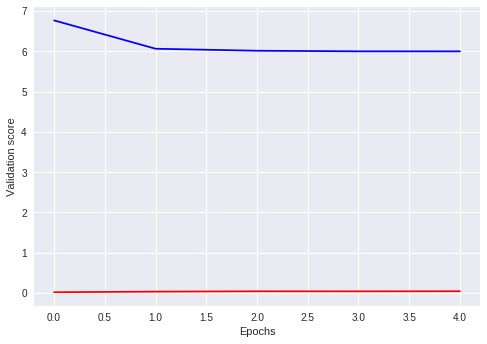

In [103]:
# Create the plot
plt.plot(tpu_model.history.history['acc'], 'r', tpu_model.history.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()
plt.show()

In [0]:
cpu_model.predict(X[0])

In [0]:
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = np.array(encoded)
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

In [96]:
print(generate_seq(model, tokenizer, 'adventures', 6))

ValueError: ignored

In [73]:
# input a word in document and predict a sentence

w = input('Enter a word: ')
w_encoded = tokenizer.texts_to_sequences([w])[0]
w_encoded


Enter a word: adventures


[562]

In [76]:
y[562]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)